<a href="https://colab.research.google.com/github/VaishU2235/ML-algorithm-for-heart-attack-detection/blob/main/Heart_Attack_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import joblib
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Read https://github.com/alex86590212/ML-algorithm-for-heart-attack-detection/blob/main/data.csv and store it to data as pandas dataframe

data = pd.read_csv("https://raw.githubusercontent.com/alex86590212/ML-algorithm-for-heart-attack-detection/main/data.csv")

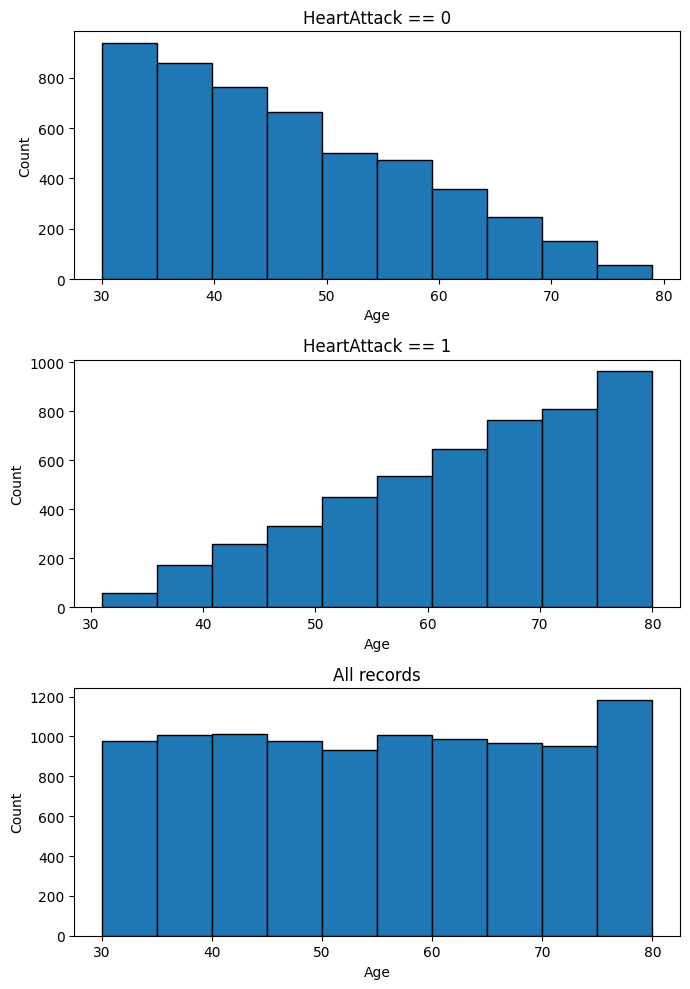

In [ ]:
# prompt: Plot Distribution of cases where HeartAttack==0 and HeartAttack==1 for different ages.

import matplotlib.pyplot as plt

# Separate data by HeartAttack value
data_0 = data[data['HeartAttack'] == 0]
data_1 = data[data['HeartAttack'] == 1]

# Create subplots for each age group
fig, axes = plt.subplots(3, 1, figsize=(7, 10))

# Plot distribution of ages for HeartAttack==0
axes[0].hist(data_0['Age'], bins=10, edgecolor='black')
axes[0].set_title('HeartAttack == 0')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Plot distribution of ages for HeartAttack==1
axes[1].hist(data_1['Age'], bins=10, edgecolor='black')
axes[1].set_title('HeartAttack == 1')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

# Plot distribution of ages
axes[2].hist(data['Age'], bins=10, edgecolor='black')
axes[2].set_title('All records')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Count')

# Combine the subplots
plt.tight_layout()
plt.show()


In [ ]:
# Create a new dataframe X with all columns except HeartAttack
X = data.drop('HeartAttack', axis=1)

# Create y with only HeartAttack column as series
y = data[['HeartAttack']]

# Do train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


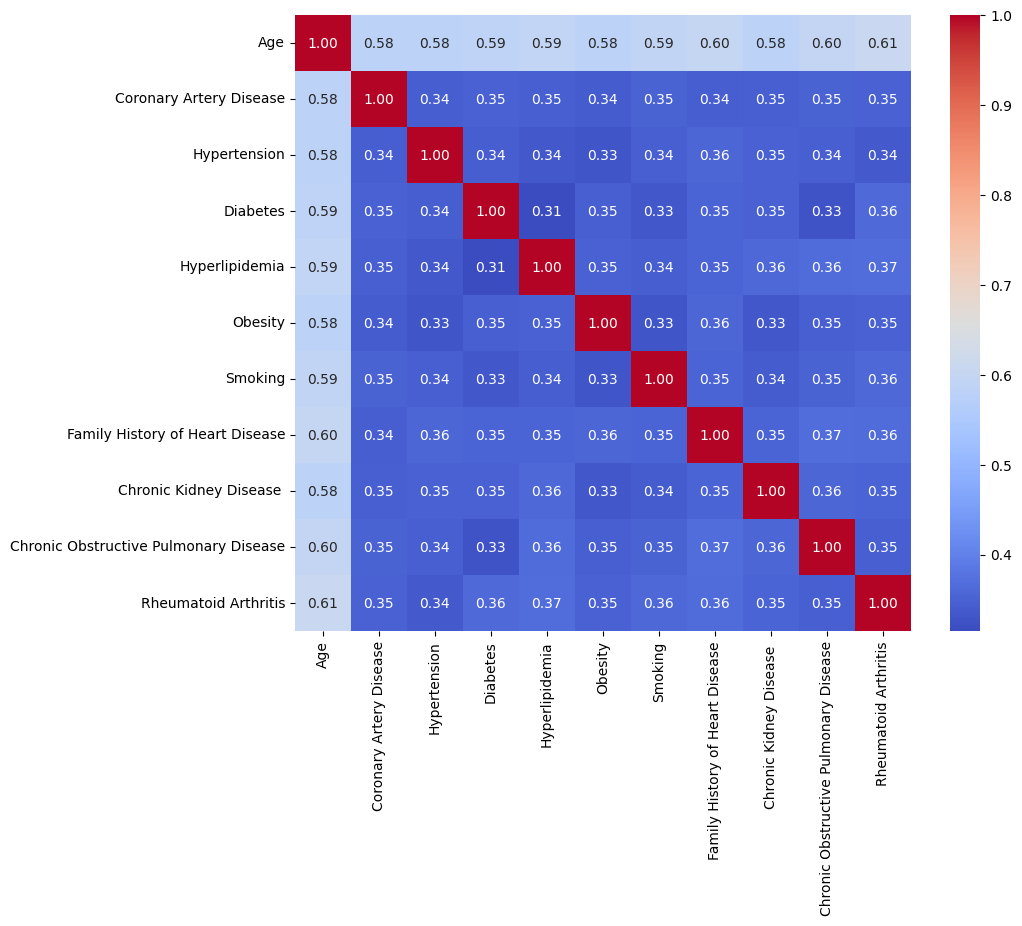

In [ ]:
# prompt: Get the correlation heatmap of X variables in X_Train excluding columns with age_group as substring in column name.

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = X_train.corr()

# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", ax=ax, cmap="coolwarm", square=True)
plt.show()


The map shows that there are several factors that are moderately correlated with CAD, including hypertension, diabetes, hyperlipidemia, obesity, smoking, family history of heart disease, chronic kidney disease, chronic obstructive pulmonary disease, and rheumatoid arthritis.

But the correlation is almost same for all values (around 0.35) which indicates bad data. Still I will go ahead and do OLS Regression and SEM model just to showcase the models.

In [ ]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)

                                 Variable       VIF
0                                     Age  8.831397
1                 Coronary Artery Disease  2.896861
2                            Hypertension  2.873750
3                                Diabetes  2.815654
4                          Hyperlipidemia  2.918184
5                                 Obesity  2.869187
6                                 Smoking  2.855151
7         Family History of Heart Disease  2.936023
8                 Chronic Kidney Disease   2.854866
9   Chronic Obstructive Pulmonary Disease  2.925303
10                   Rheumatoid Arthritis  3.009967


VIF is too high. The data is basically bad. But still we can use this data to explore some models.

# Fitting Logistic Regression

In [ ]:
import statsmodels.api as sm

# Add a constant term to the independent variables matrix
X_train = sm.add_constant(X_train)

# Fit logistic regression model
logit_model = sm.Logit(y_train, X_train)

# Obtain the results of the logistic regression model
logit_result = logit_model.fit()

# Display the summary of the logistic regression model
print(logit_result.summary())


Optimization terminated successfully.
         Current function value: 0.444719
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            HeartAttack   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7988
Method:                           MLE   Df Model:                           11
Date:                Tue, 30 Jan 2024   Pseudo R-squ.:                  0.3584
Time:                        16:47:06   Log-Likelihood:                -3557.8
converged:                       True   LL-Null:                       -5545.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.5754      

In [285]:
y_pred = logit_result.predict(sm.add_constant(X_test))

In [290]:
y_pred=y_pred>0.5

In [291]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy

0.7915

In [292]:
print(report)

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1014
           1       0.79      0.79      0.79       986

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000



# PATH ANALYSIS

In [ ]:
!pip install semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 8.3 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659680 sha256=dd632f08d39891e4cd5227311854a93b793d449a56986c45e0f93a0b037c9d9f
  Stored in directory: /root/.cache/pip/wheels/53/ec/0d/0b294c02d8c4e9e80afea58839f2c1b4706770594bc99ec045
Successfully built semopy


In [ ]:
# For every column in data, if column name has space, replace it with underscore.

data.columns = data.columns.str.replace(' ', '_')

In [ ]:
" + ".join(data.columns)

'Age + Coronary_Artery_Disease + Hypertension + Diabetes + Hyperlipidemia + Obesity + Smoking + Family_History_of_Heart_Disease + Chronic_Kidney_Disease_ + Chronic_Obstructive_Pulmonary_Disease + Rheumatoid_Arthritis + HeartAttack'

In [275]:
import semopy
import pandas as pd

# Assuming 'data' is your DataFrame with observed variables
# Replace 'your_model_specification' with the actual path model specification

# Define the path model specification
model_specification = '''
    # Measurement model
    # Lifestyle =~ Obesity + Smoking + Hypertension
    # Lifestyle_diseases =~ Diabetes + Hyperlipidemia
    Heriditory_heart =~ Family_History_of_Heart_Disease + Chronic_Obstructive_Pulmonary_Disease + Coronary_Artery_Disease
    # Heriditory_other =~ Rheumatoid_Arthritis + Chronic_Kidney_Disease_
    # Above you can see some latent variables that I tried to create based on subject matter understanding. In the end, it resulted in lower CFI score.
    # So, I removed them.


    # Structural model
    # HeartAttack ~ Age + Coronary_Artery_Disease + Lifestyle + Diabetes + Hyperlipidemia + Family_History_of_Heart_Disease + Chronic_Kidney_Disease_ + Chronic_Obstructive_Pulmonary_Disease + Rheumatoid_Arthritis
    # HeartAttack ~ Age + Heriditory_heart + Hypertension + Diabetes + Hyperlipidemia + Obesity + Smoking + Chronic_Kidney_Disease_ + Rheumatoid_Arthritis
    # Above are the some models that I tried. It resulted in lower CFI Score

    # HeartAttack ~ Age + Coronary_Artery_Disease + Hypertension + Diabetes + Hyperlipidemia + Obesity + Smoking + Family_History_of_Heart_Disease + Chronic_Kidney_Disease_ + Chronic_Obstructive_Pulmonary_Disease + Rheumatoid_Arthritis
    # Above is the regression model.
    HeartAttack ~ Age + Heriditory_heart + Obesity + Smoking + Hypertension + Diabetes + Hyperlipidemia + Rheumatoid_Arthritis + Chronic_Kidney_Disease_

    # residual correlations
    # Lifestyle ~~ Diabetes
    # Lifestyle ~~ Hyperlipidemia
    # Heriditory_heart ~~ Heriditory_other
'''

# Fit the path model
model = semopy.Model(model_specification)
# fit = semopy.sem(data, model)

# Fit the path model
fit = model.fit(data)
# Display results
print(fit)


Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.964
Number of iterations: 21
Params: 1.023 0.998 -0.001 0.515 0.105 0.111 0.096 0.117 0.119 0.101 0.103 0.159 0.163 0.163 0.136 0.087


In [276]:
ins = model.inspect()
ins

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Family_History_of_Heart_Disease,~,Heriditory_heart,1.000000,-,-,-
1,Chronic_Obstructive_Pulmonary_Disease,~,Heriditory_heart,1.023103,0.030359,33.699894,0.0
2,Coronary_Artery_Disease,~,Heriditory_heart,0.998351,0.029681,33.636025,0.0
3,HeartAttack,~,Age,-0.001348,0.000563,-2.39561,0.016593
4,HeartAttack,~,Heriditory_heart,0.514698,0.01939,26.54455,0.0
5,HeartAttack,~,Obesity,0.105469,0.009374,11.251232,0.0
6,HeartAttack,~,Smoking,0.111439,0.009409,11.844204,0.0
7,HeartAttack,~,Hypertension,0.096366,0.009335,10.323436,0.0
8,HeartAttack,~,Diabetes,0.116901,0.009365,12.482258,0.0
9,HeartAttack,~,Hyperlipidemia,0.118686,0.009471,12.532146,0.0


In [277]:
stats = semopy.calc_stats(model)
print(stats.T)

                      Value
DoF               62.000000
DoF Baseline      74.000000
chi2            9638.444715
chi2 p-value       0.000000
chi2 Baseline  48329.000436
CFI                0.801545
GFI                0.800566
AGFI               0.761966
NFI                0.800566
TLI                0.763134
RMSEA              0.124288
AIC               30.072311
BIC              145.437757
LogLik             0.963844


In [278]:
y_pred = model.predict(X_test)

<Axes: >

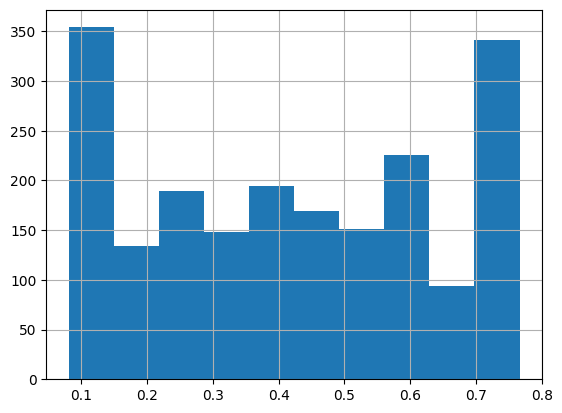

In [279]:
y_pred['HeartAttack'].hist()

In [280]:
y_pred=y_pred['HeartAttack']>0.5

In [281]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy

0.7645

In [282]:
print(report)

              precision    recall  f1-score   support

           0       0.72      0.87      0.79      1014
           1       0.83      0.66      0.73       986

    accuracy                           0.76      2000
   macro avg       0.78      0.76      0.76      2000
weighted avg       0.78      0.76      0.76      2000



# PATH ANALYSIS DIAGRAM

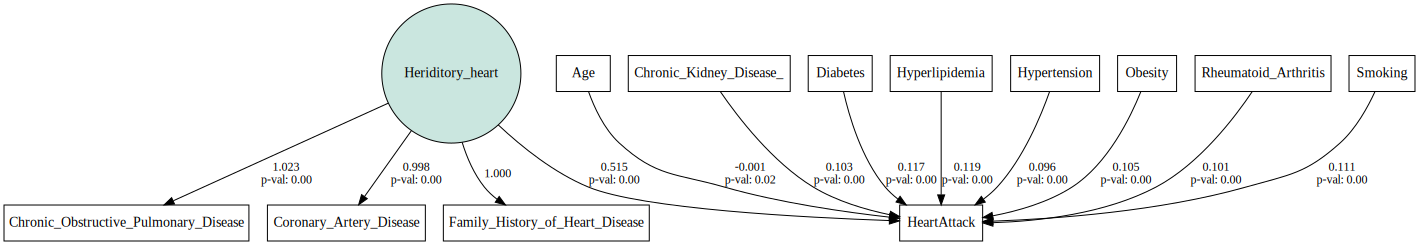

In [283]:
semopy.semplot(model, "pd.png")